**The Overall EDA is performed in 3 Sections.**(Each Section Header provides the sequence for Analysis along with the OutCome)
  - **Section 1**
  - **Section 2**
  - **Section 3**  

**Section 1 : Read DataFrame and perform the Data Cleaning Activity**  
   -  Drop Columns which do not have any values across all Rows.  
   -  Drop Columns which have more than 50% of the Rows with empty values.  
   -  Change values of columns like loan status to business standard like "Default" and "Non-Default"  
   -  Drop Rows which have all column values as NA or Null
   -  Drop Rows which are duplicate

**OutCome of Section**  
   - The initial Data Frame of shape (39717, 111) was reduced to (39717, 54) with business terminologies(loan_status) "Default" and "Non-Default"

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
df = pd.read_csv("loan.csv",low_memory=False)
warnings.filterwarnings('ignore')
df.shape

(39717, 111)

In [4]:
# Dropping the columns which have all its values as "NA"
df.dropna(axis = 1, how = 'all', inplace = True)
df.shape

(39717, 57)

In [5]:
# Dropping the columns which have more that 50% of its values as NA"
df = df.loc[:, df.isnull().mean() < 0.5]

# Dropping the Rows if all columns have NA , duplicate Rows"
df = df.dropna(how='all')
df.drop_duplicates(inplace=True)
df = df.dropna(subset=['int_rate', 'annual_inc'])

# DataType Changes for int_rate and applyig Business Terminology for loan_status
df['int_rate'] = df['int_rate'].str.replace('%', '').astype(float)
df.loc[df['loan_status'] == 'Charged Off', 'loan_status'] = 'Default'
df.loc[df['loan_status'] == 'Fully Paid', 'loan_status'] = 'Non-Default'
df.shape

(39717, 54)

**Section 2 : Perform Analysis on the Numeric Data to see their relationship with Loan Status**  
   - Check for Outliers and Remove them  
   - Check for Correlation between the numeric fields and Loan Status
   - Columns considered 'delinq_2yrs','inq_last_6mths','loan_amnt','int_rate', 'annual_inc','dti'

**OutCome of this section**  
   - Outliers were identified for annual_inc and removed using IQR since annual_inc did not have a normal distribution 
   - For the Correlation analysis perfomed using heatmap and distribution via Box pLot  
       - **int_rate** indicates that Loans with higher int_rate have more risk of getting Defaulted
       - **dti** Debt to Income Ratio indicates that higher dti ratio are at higher risk of getting Defaulted
       - **annual_inc** even though the correlation is not very prominent but still lower annual inc have higher risk of getting Defaulted  
       - **loan_amt** even though the correlation is not very prominent but still higher loan_amt have higher risk of getting Defaulted  
        
           

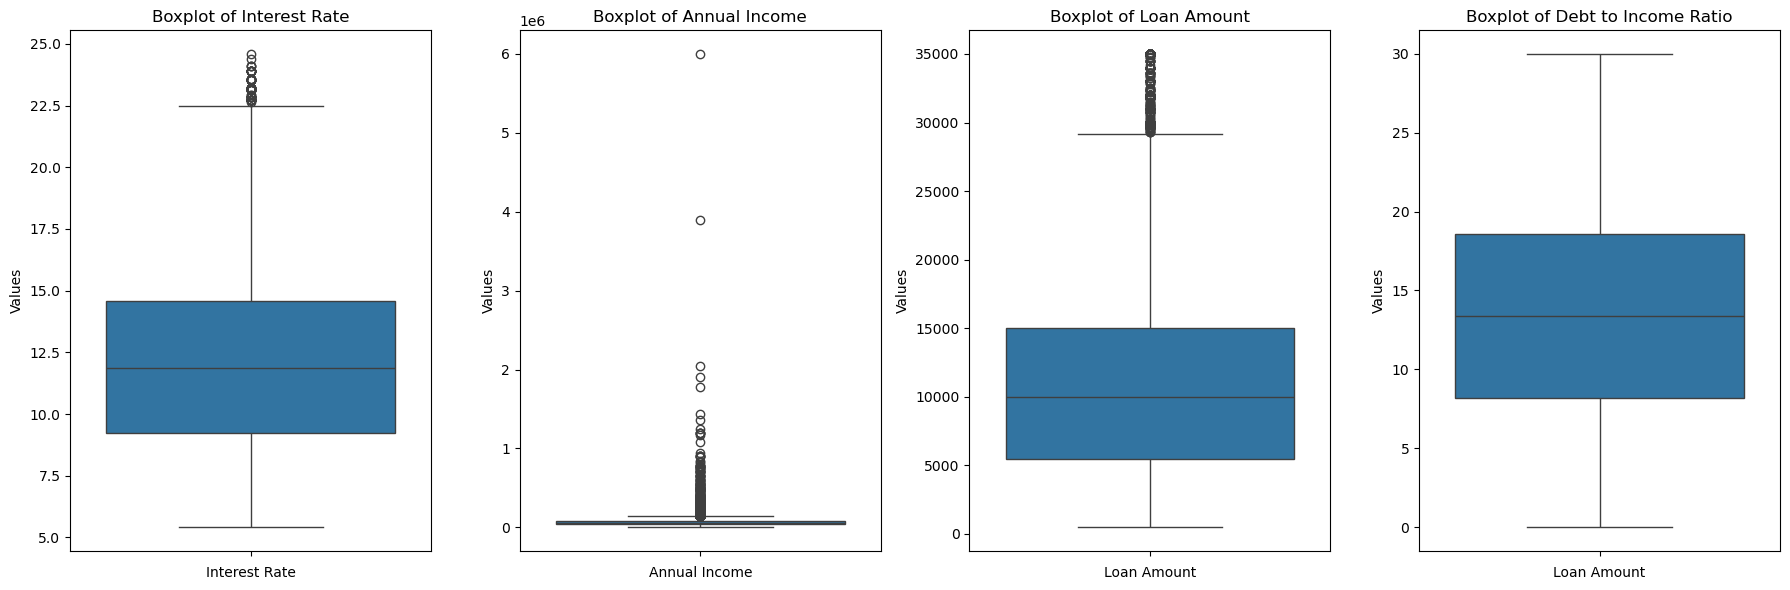

In [7]:
# Box Plot to identity Outliers in int_rate,annual_inc,loan_amnt
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

# Boxplot for int_rate
sns.boxplot(df['int_rate'], ax=axes[0])
axes[0].set_title("Boxplot of Interest Rate")
axes[0].set_xlabel("Interest Rate")
axes[0].set_ylabel("Values")

# Boxplot for annual_inc
sns.boxplot(df['annual_inc'], ax=axes[1])
axes[1].set_title("Boxplot of Annual Income")
axes[1].set_xlabel("Annual Income")
axes[1].set_ylabel("Values")

# Boxplot for loan_amnt
sns.boxplot(df['loan_amnt'], ax=axes[2])
axes[2].set_title("Boxplot of Loan Amount")
axes[2].set_xlabel("Loan Amount")
axes[2].set_ylabel("Values")

sns.boxplot(df['dti'], ax=axes[3])
axes[3].set_title("Boxplot of Debt to Income Ratio")
axes[3].set_xlabel("Loan Amount")
axes[3].set_ylabel("Values")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

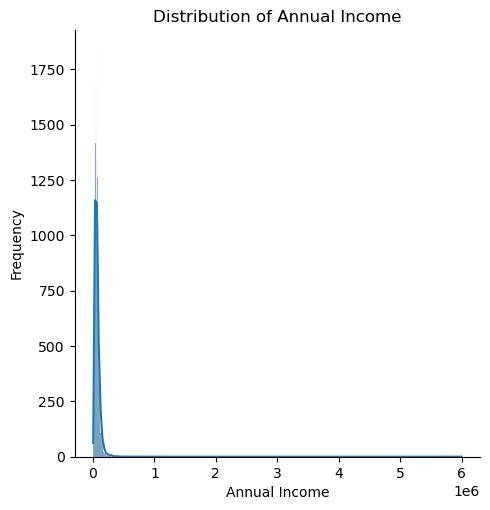

In [8]:
# Since the annual_inc had outliers we need to identify the distribution in orer to  choose the most appropriate logic for removing identifiers  
sns.displot(df['annual_inc'], kde=True) 
# Set the title and labels
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
# Show the plot
plt.show()

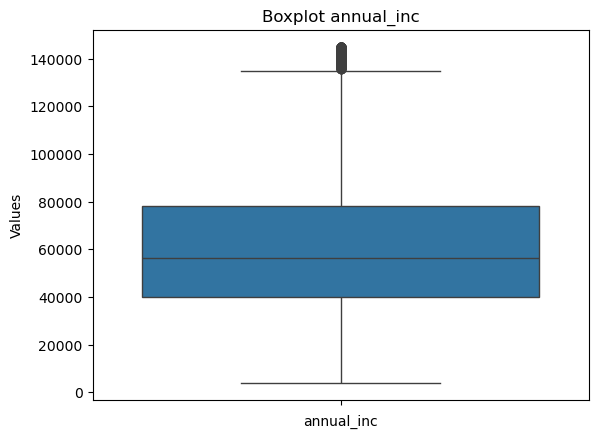

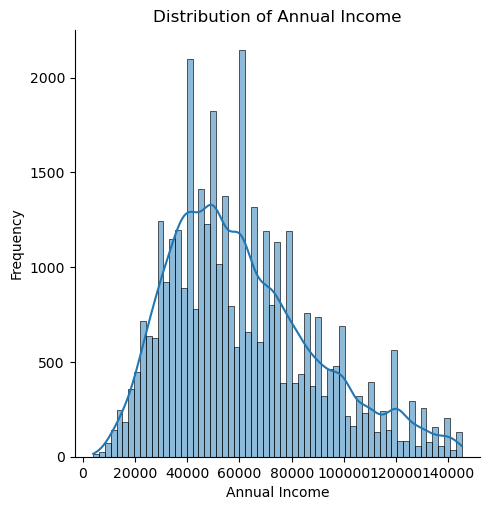

In [9]:
# Since the distribution curve is not normal we would be proceeding with IQR to remove outliers    
Q1 = df['annual_inc'].quantile(0.25)
Q3 = df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove rows with outliers in 'annual_inc'
df = df[(df['annual_inc'] >= lower_bound) & (df['annual_inc'] <= upper_bound)]
df.shape
sns.boxplot(df['annual_inc'])

# Box PLot after removing Outliers
plt.title("Boxplot annual_inc")
plt.xlabel("annual_inc")
plt.ylabel("Values")

# Distribution plot after removing outliers
sns.displot(df['annual_inc'], kde=True) 
# Set the title and labels
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
# Show the plot
plt.show()

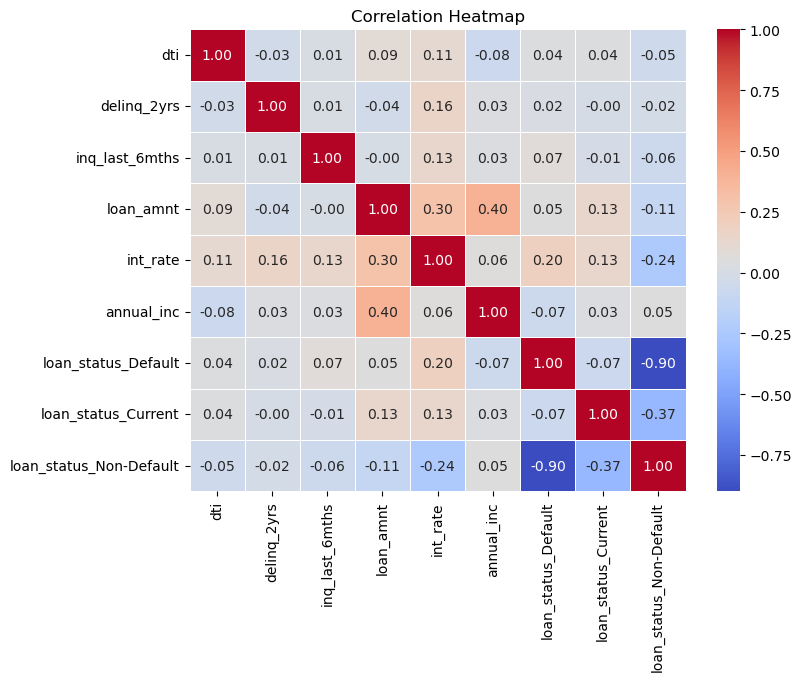

In [10]:
# Now Since Ouliers have been removed we try to analyze correlation factor

df_encoded = pd.get_dummies(df, columns=['loan_status'], drop_first=False)
# Calculate the correlation matrix
corr_matrix = df_encoded[['dti','delinq_2yrs','inq_last_6mths','loan_amnt','int_rate', 'annual_inc', 'loan_status_Default', 'loan_status_Current', 'loan_status_Non-Default']].corr()
# Display the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)

# Add title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

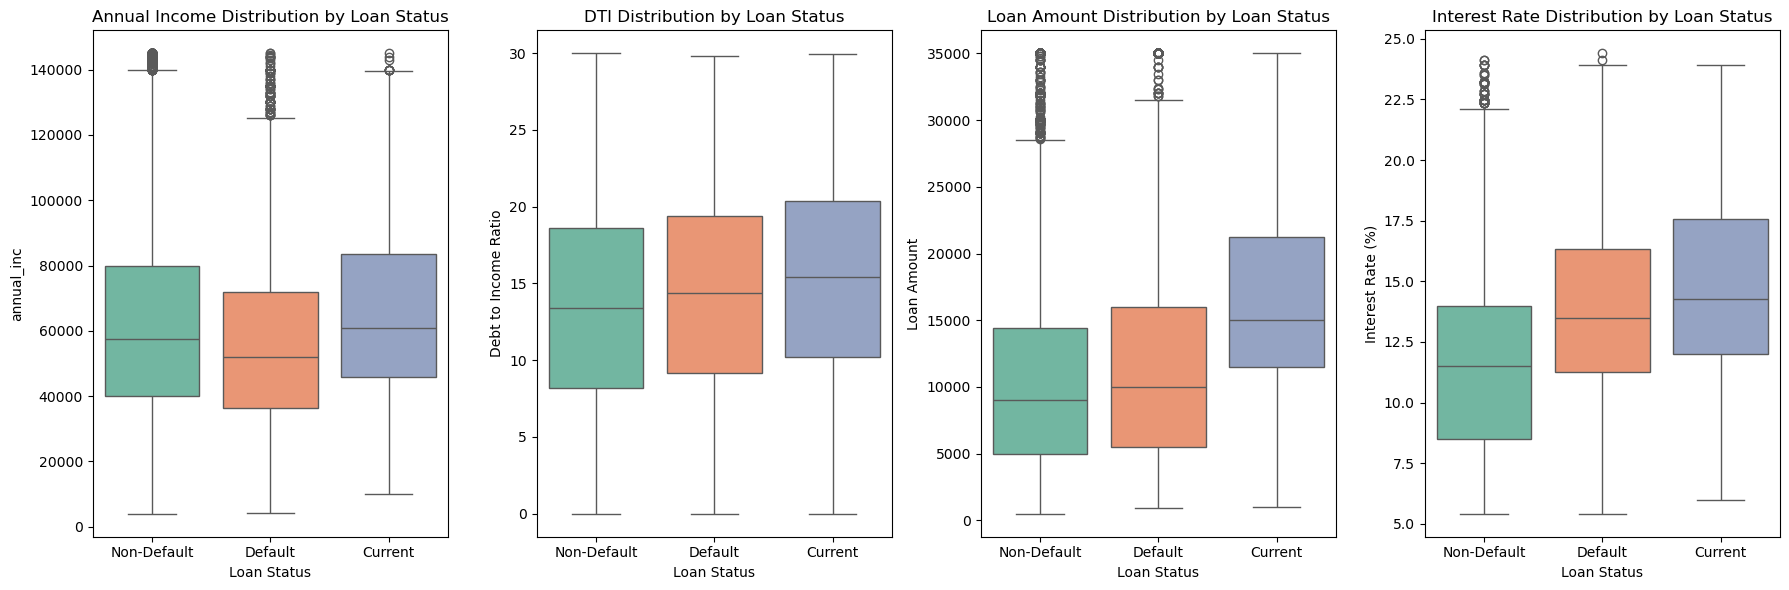

In [11]:
# Analyze The Distribution of annual_inc,loan_amt,int_rate across different loan status (Non-Default, Deafult and Current) 

fig, axes = plt.subplots(1, 4, figsize=(18, 6))

# First Boxplot: annual_inc by loan_status
sns.boxplot(x='loan_status', y='annual_inc', data=df, palette="Set2", ax=axes[0])
axes[0].set_title('Annual Income Distribution by Loan Status')
axes[0].set_xlabel('Loan Status')
axes[0].set_ylabel('annual_inc')

# First Boxplot: dti (DEbt to income ratio) by loan_status
sns.boxplot(x='loan_status', y='dti', data=df, palette="Set2", ax=axes[1])
axes[1].set_title('DTI Distribution by Loan Status')
axes[1].set_xlabel('Loan Status')
axes[1].set_ylabel('Debt to Income Ratio')

# Second Boxplot: loannual_incamnt by loan_status
sns.boxplot(x='loan_status', y='loan_amnt', data=df, palette="Set2", ax=axes[2])
axes[2].set_title('Loan Amount Distribution by Loan Status')
axes[2].set_xlabel('Loan Status')
axes[2].set_ylabel('Loan Amount')

# Third Boxplot: int_rate by loan_status
sns.boxplot(x='loan_status', y='int_rate', data=df, palette="Set2", ax=axes[3])
axes[3].set_title('Interest Rate Distribution by Loan Status')
axes[3].set_xlabel('Loan Status')
axes[3].set_ylabel('Interest Rate (%)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

**Section3 - Perform Analysis on the Categorical Variables to see their relationship with Loan Status**  
  - Check for Relationship between Categorical Varaibles and Loan Status  
  - Columns considered 'term','grade','emp_length','home_ownership', 'verification_status', 'purpose','addr_state','pub_rec','pub_rec_bankruptcies'

**OutCome of this Section**
  - The following Categorical Variables have a considerable or prominent impact on Loan getting Defaulted  
      - **term** , Higher Term like 60 months are at a higher risk of getting defaulted  
      - **grade** , lower the grade then higher is the risk of getting defaulted  
      - **purpose** , the purpose named small_business has an higher probability of getting defaulted  
      - **addr_state** ,  the state 'NE' has a higher probability of getting defaulted though the count of samples considered are very less  
      - **pub_rec_bankruptcies**, higher the number of publicly recorded bankruptcies relates to higher risk of getting Defaulted
        <br><br>               
  - The following Categorical Variables do not have a significant or prominent impact on Loan getting Deafulted
      - **emp_length**  
      - **home_ownership**  
      - **verification_status**  
      - **pub_rec**  


In [13]:
# Create a Reusable Method that would plot bar chart to analyze the loan status distribution in terms of percentage for a particular categorical variable

def plot_loan_status_percentage(df, column1, column2): 
    """
    This function takes in a dataframe and two columns to analyze the loan status distribution.
    It groups the data by the two columns, normalizes the loan status percentages, 
    and then plots a stacked bar chart.

    :param df: DataFrame containing the data
    :param column1: The first column to group by (e.g., 'purpose')
    :param column2: The second column to group by (e.g., 'loan_status')
    """
    # Group the data by the two columns and get the count of loan status
    loan_status_percentage = df.groupby([column1, column2]).size().unstack(fill_value=0)
    total_count_column1 = df.groupby(column1).size()   

    
    # Normalize the data to get percentages
    loan_status_percentage = loan_status_percentage.div(loan_status_percentage.sum(axis=1), axis=0) * 100

    # Plotting the stacked bar chart
    ax = loan_status_percentage.plot(kind='bar', stacked=True, figsize=(15, 6), color=['lightblue', 'salmon', 'lightgreen'])

    # Add title and labels
    plt.title(f'Percentage Distribution of Loan Status by {column1} and {column2}')
    plt.xlabel(column1)
    plt.ylabel('Percentage (%)')

    # Add a legend
    plt.legend(title='Loan Status')

     # Annotate the bars with percentage values
    if column1 != 'addr_state' and column1 != 'sub_grade':
     for p in ax.patches:
        height = p.get_height()
        width = p.get_width()
        x_position = p.get_x() + width / 2
        y_position = p.get_y() + height / 2
        percentage = f'{height:.1f}%'  # Format the percentage value
        ax.annotate(percentage, (x_position, y_position), color='black', ha='center', va='center')


    # Show the plot
    plt.show()

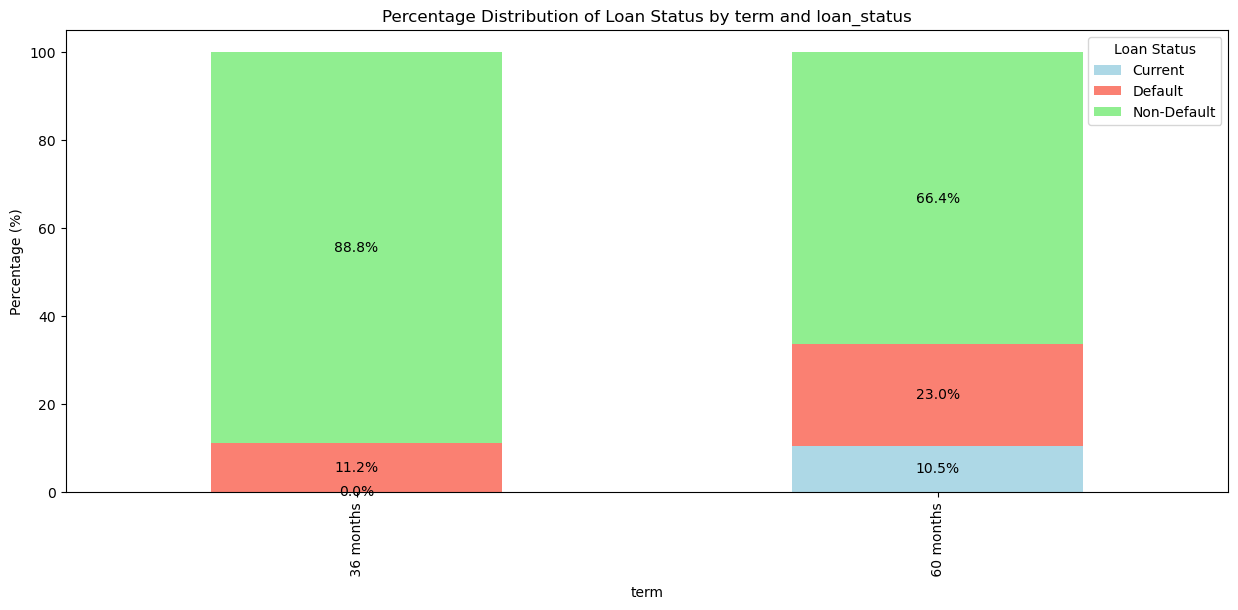

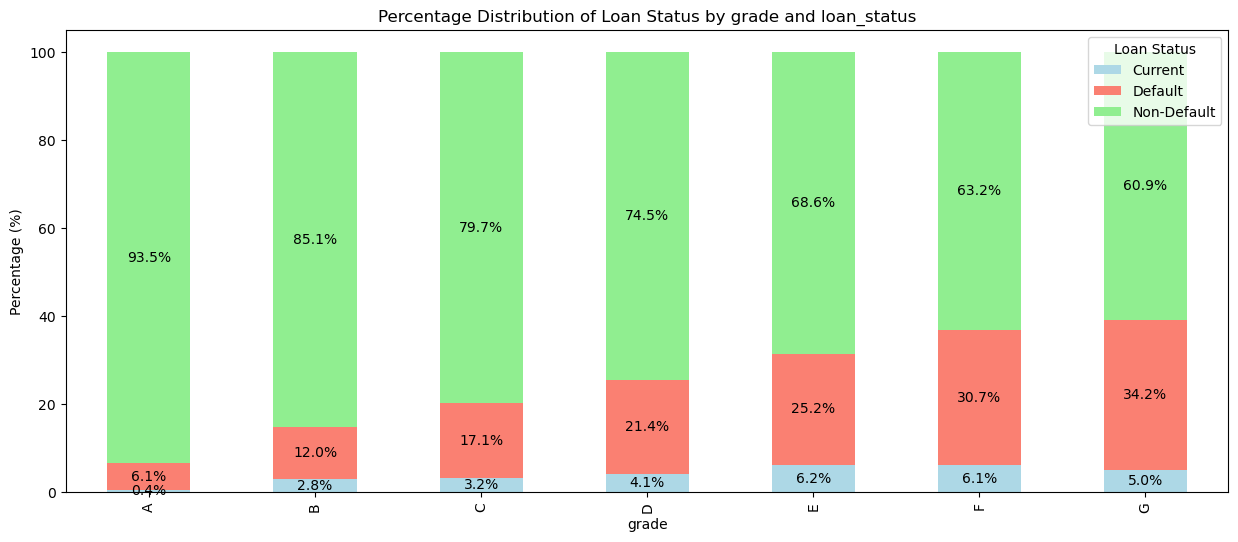

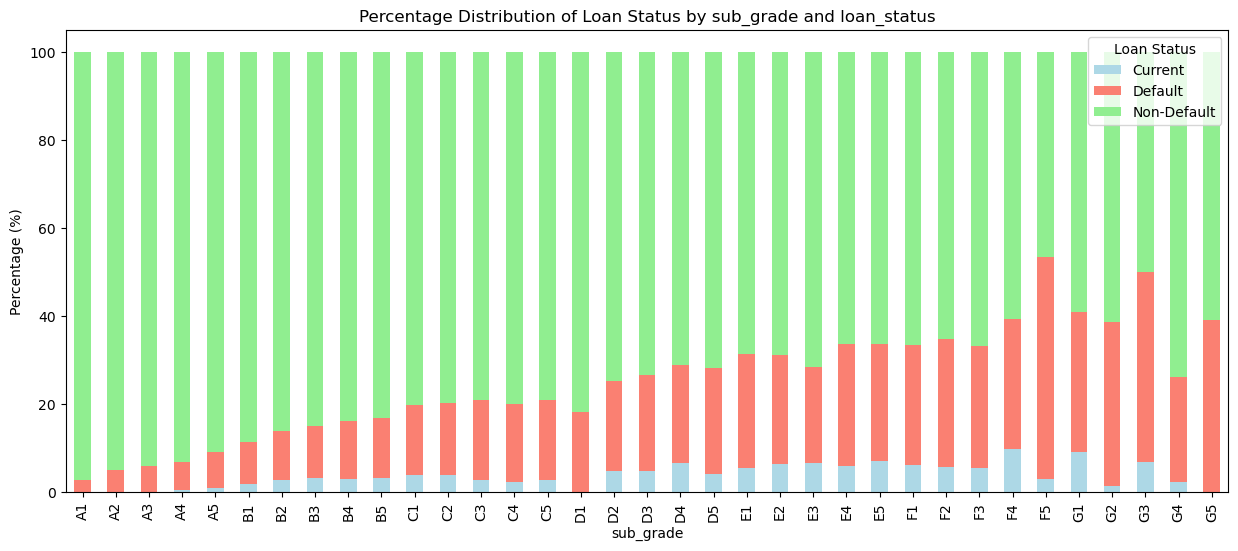

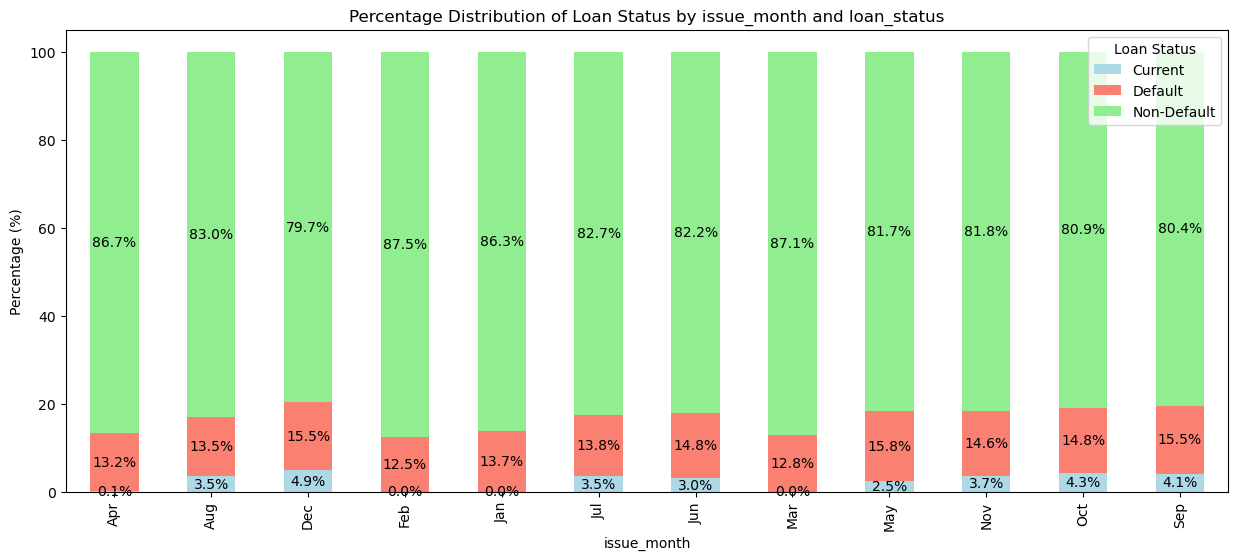

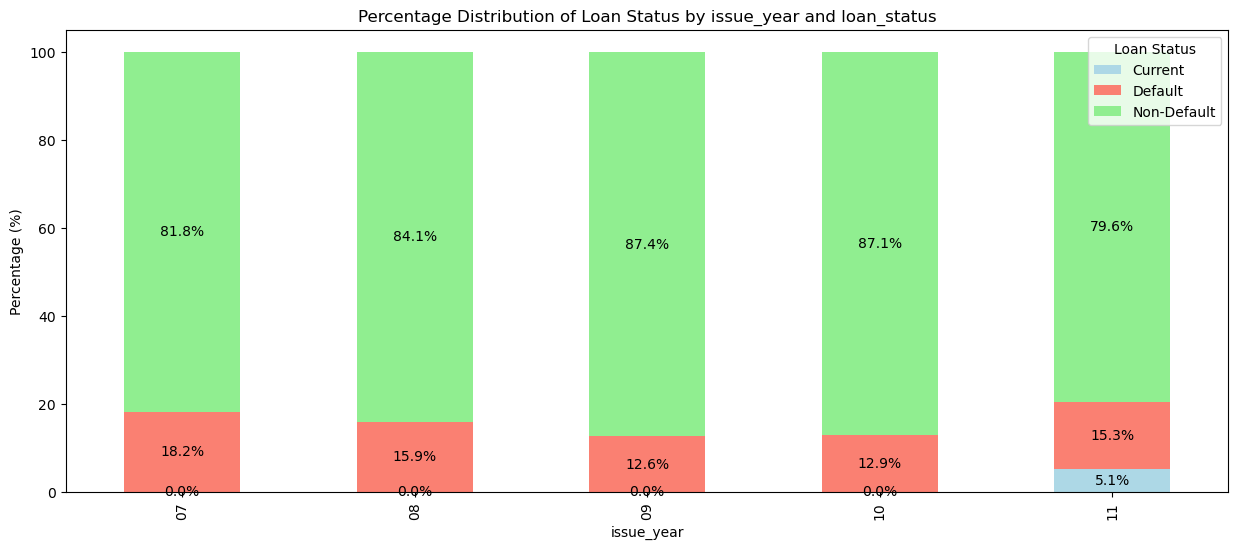

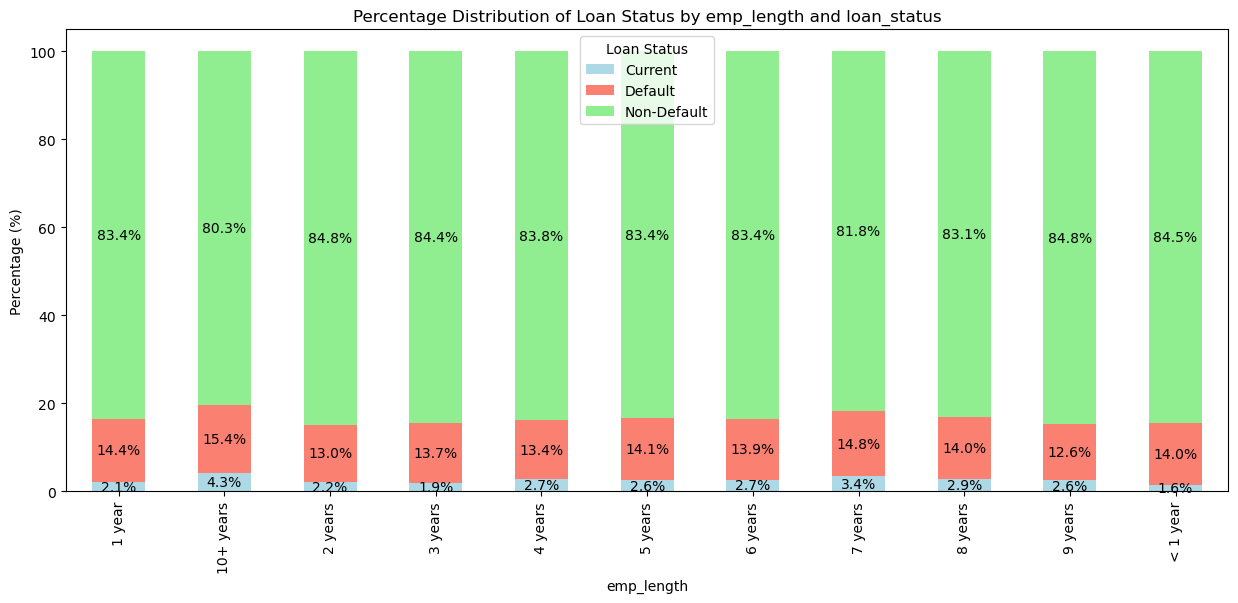

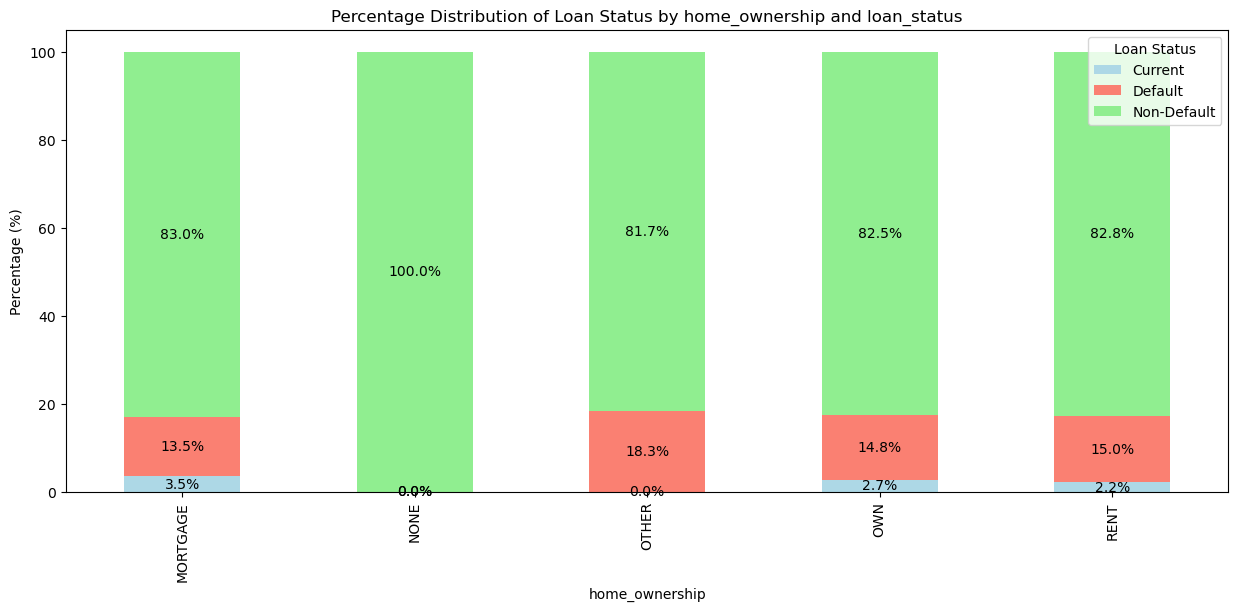

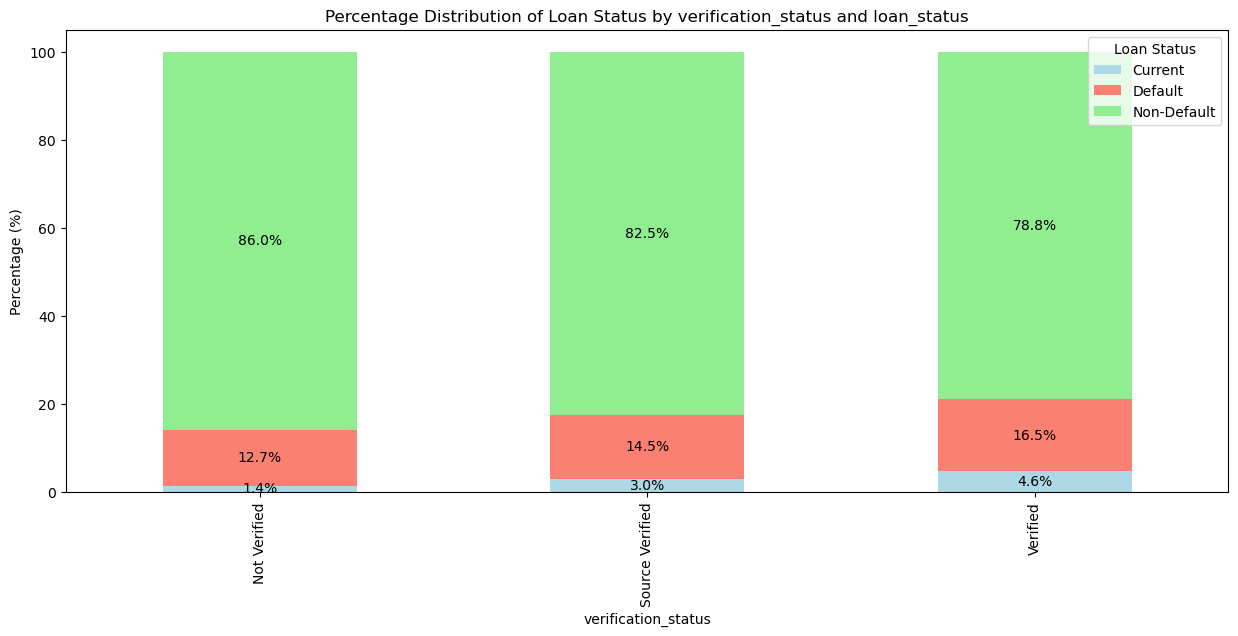

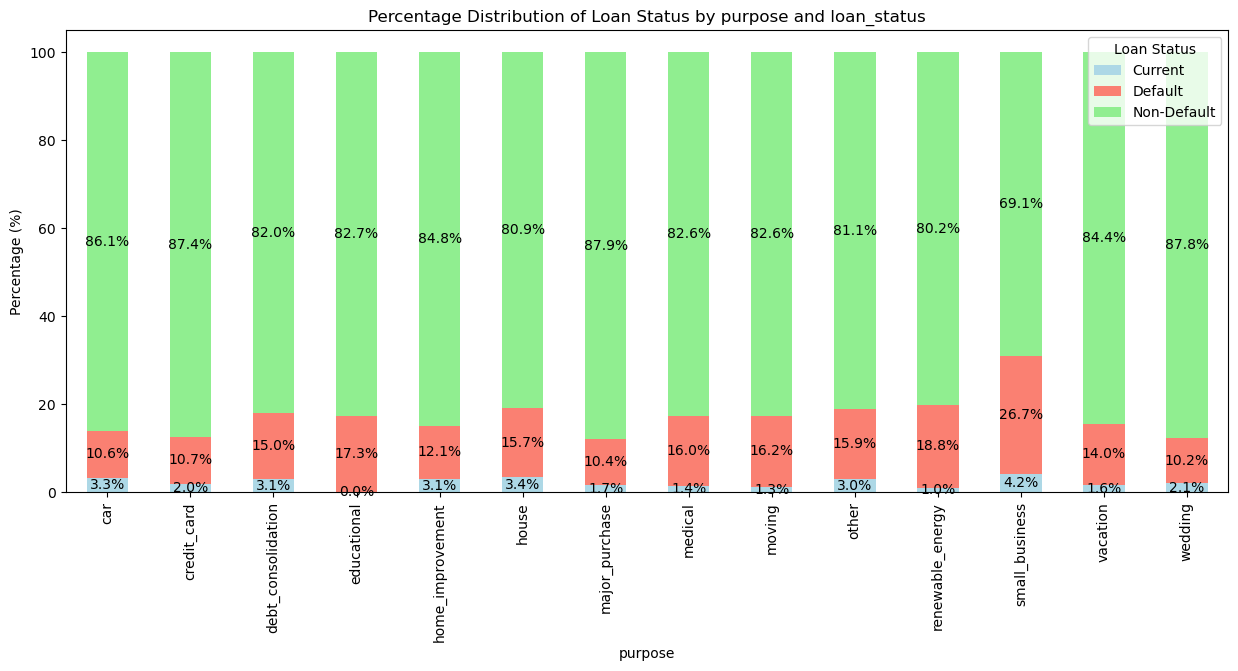

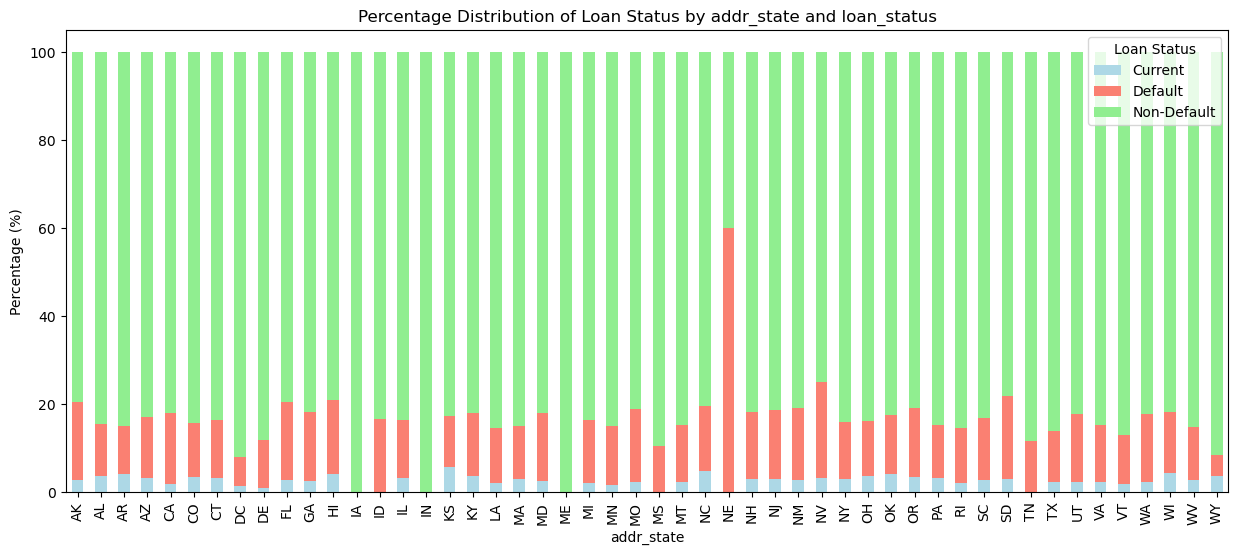

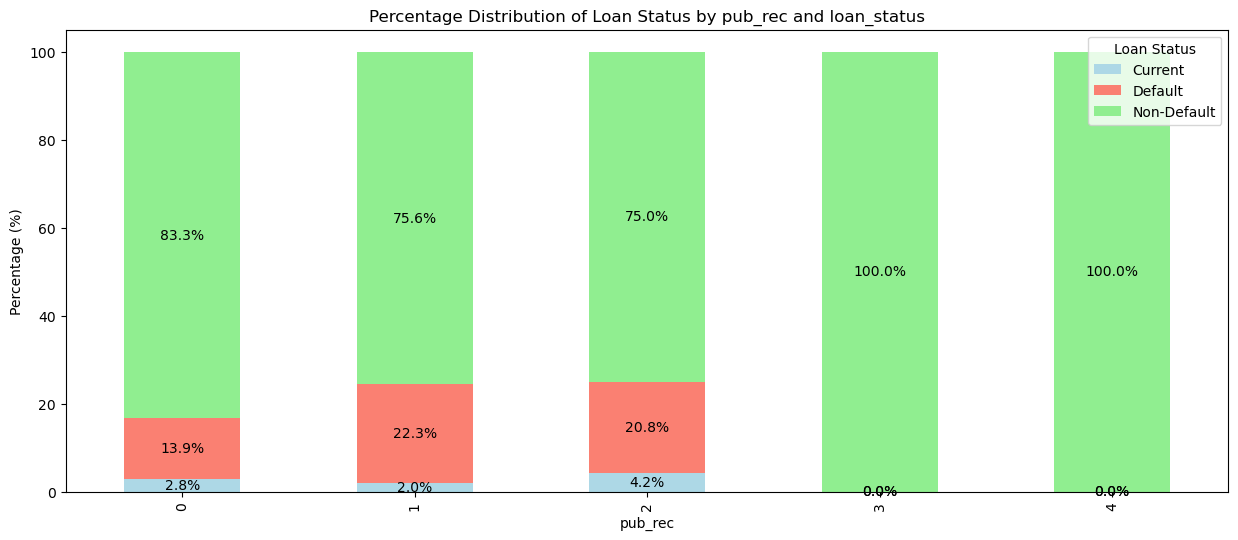

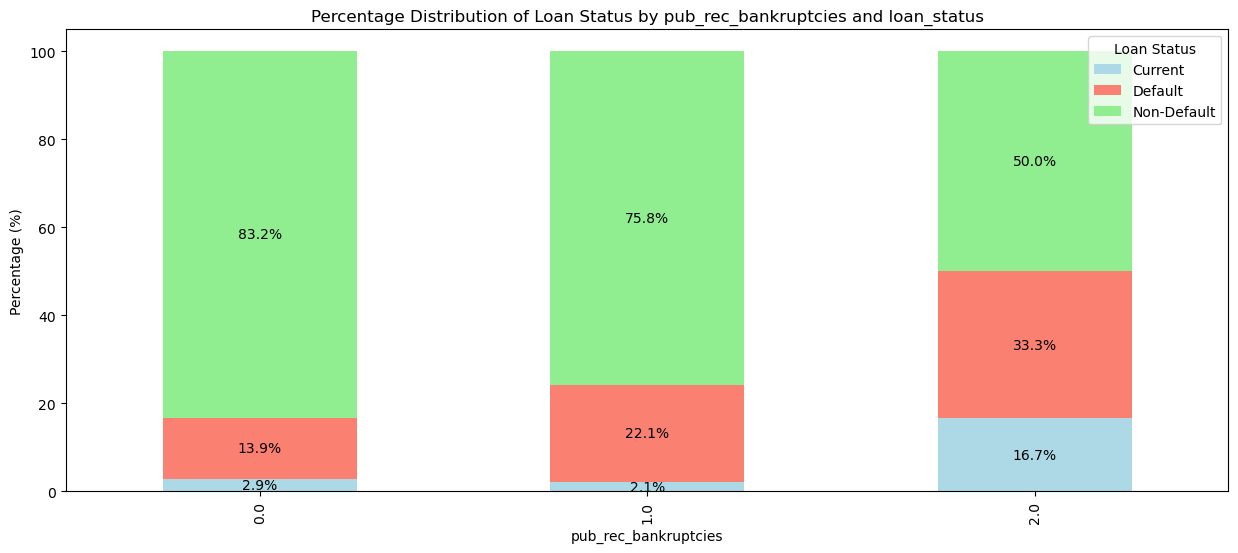

In [14]:
# Call the Reusable method to analyzie the percentage distribution for different categorical variables
df[['issue_month', 'issue_year']] = df['issue_d'].str.split('-', expand=True)
plot_loan_status_percentage(df, 'term', 'loan_status')
plot_loan_status_percentage(df, 'grade', 'loan_status')
plot_loan_status_percentage(df, 'sub_grade', 'loan_status')
plot_loan_status_percentage(df, 'issue_month', 'loan_status')
plot_loan_status_percentage(df, 'issue_year', 'loan_status')
plot_loan_status_percentage(df, 'emp_length', 'loan_status')
plot_loan_status_percentage(df, 'home_ownership', 'loan_status')
plot_loan_status_percentage(df, 'verification_status', 'loan_status')
plot_loan_status_percentage(df, 'purpose', 'loan_status')
plot_loan_status_percentage(df, 'addr_state', 'loan_status')
plot_loan_status_percentage(df, 'pub_rec', 'loan_status')
plot_loan_status_percentage(df, 'pub_rec_bankruptcies', 'loan_status')
